In [2]:
%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


## Crossover tests

In [3]:
algorithms = ['SSGA', 'GGA', 'PSO', 'DE', 'CMA-ES']
algorithms_parameters_number = [2, 2, 4, 5, 2]
functions = ['BentCigar', 'Schaffers', 'Katsuura']
crossovers = ['Average', 'AverageWeighted', 'CoinFlip', 'CoinFlipWeighted', 'NPoints']

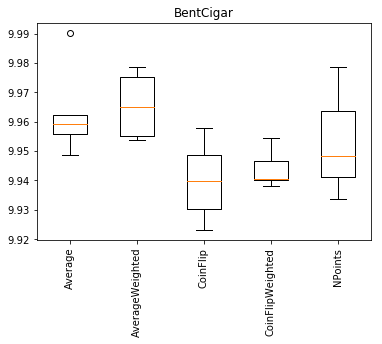

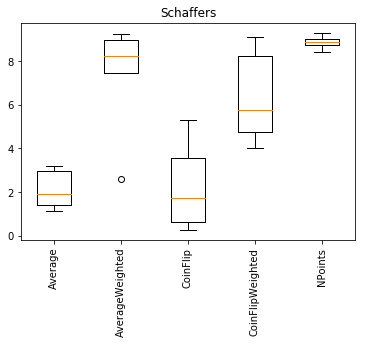

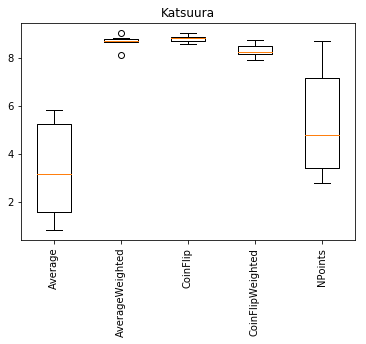

In [63]:
crossover_dir = 'logs/crossoverTests/'
folders = sorted(os.listdir(crossover_dir))
runs_number = 6

fitness = np.zeros((len(algorithms), len(functions), runs_number))
function = 0
crossover = 0
for folder in folders:
    folder_name = crossover_dir + folder
    with open(folder_name + '/run.log') as f:
        n = 0
        for line in f.readlines():
            line = line.replace('\n', '').split()
            if line[0] == "Score:":
                fitness[crossover, function, n] = (float(line[1]))
                n+=1
    function = (function + 1) % len(functions)
    if function == 0:
        crossover += 1

axis = np.arange(1, len(algorithms) + 1)

for index, function in enumerate(functions):
    plt.figure()
    plt.boxplot(np.transpose(fitness[:,index,:]))
    plt.xticks(axis, crossovers, rotation='vertical')
    plt.title(function)

## GridSearch

In [4]:
def get_possible_combinations(algorithm_files):
    parameter_combinations = []
    for filename in algorithm_files:
        filename = filename.split('n -D')
        filename = '-D' + ''.join(filename[1:]).replace('.log', '')
        parameter_combinations.append(filename)
        
    parameter_combinations = list(set(parameter_combinations)) # remove duplicated parameters
    return np.array(parameter_combinations)

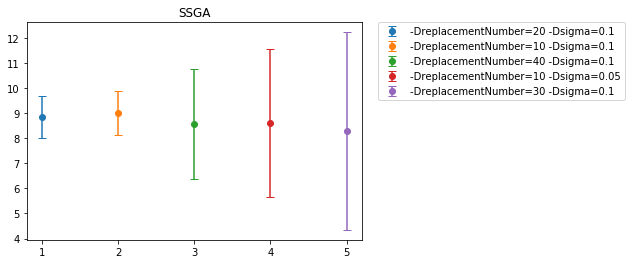

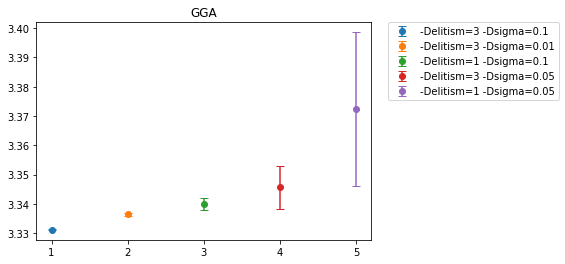

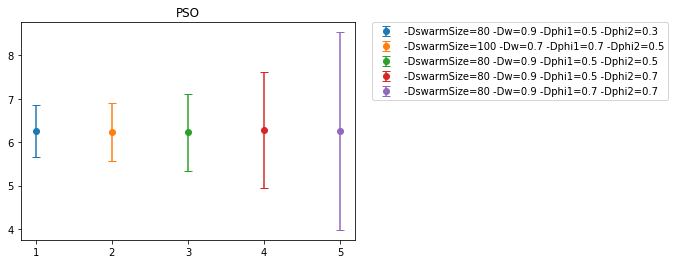

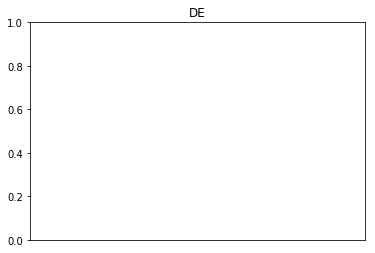

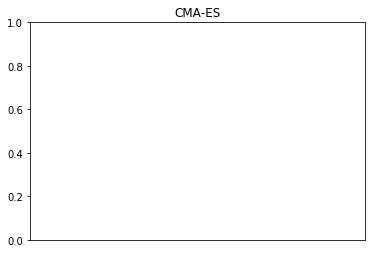

In [53]:
gridsearch_dir = 'logs/gridSearch/'
files = sorted(os.listdir(gridsearch_dir))
runs_number = 8

algorithms_fitnesses = []

# load the data and put it in a list of matrices of size (P, 3, 8)
for algorithm_index, algorithm in enumerate(algorithms):
    algorithm_files = sorted(filter(lambda x: algorithm in x, files))
    parameter_combinations = get_possible_combinations(algorithm_files)
    
    parameters_fitnesses = np.zeros((len(parameter_combinations), len(functions), runs_number)) # (P, 3, 8)
    
    # filter out the files relative to a specific combination
    for parameter_combination_index, parameter_combination in enumerate(parameter_combinations):
        parameter_files = filter(lambda x: parameter_combination in x, algorithm_files)
        
        for function_index, filename in enumerate(parameter_files):
            with open(gridsearch_dir + filename) as f:
                n = 0
                for line in f.readlines():
                    line = line.replace('\n', '').split()
                    if line[0] == "Score:":
                        parameters_fitnesses[parameter_combination_index, function_index, n] = (float(line[1]))
                        n+=1
    algorithms_fitnesses.append((parameters_fitnesses, parameter_combinations))
    
# for every algorithm find the best parameter combination, highest average mean and lowest variance
for algorithm_index, (algorithm_fitnesses, parameter_combinations) in enumerate(algorithms_fitnesses):
    mean_parameter_combinations = np.mean(algorithm_fitnesses, axis = (2, 1)) # (P, 1)
    variance_parameter_combinations = np.max(np.var(algorithm_fitnesses, axis = 2), axis=1) # (P, 1)
    
    # find the indexes of the best means
    best_indexes = np.argsort(mean_parameter_combinations)[-5:]
    
    best_means = mean_parameter_combinations[best_indexes]
    best_variances = variance_parameter_combinations[best_indexes]
    best_parameters = np.array(parameter_combinations)[best_indexes]
    
    # find indexes of the lowest variances (of the best means)
    best_indexes = np.argsort(best_variances)

    best_means = best_means[best_indexes]
    best_variances = best_variances[best_indexes]
    best_parameters = best_parameters[best_indexes]

    axis = np.arange(1, best_means.shape[0] + 1)
    
    plt.figure()
    for index, parameter in enumerate(best_parameters):
        plt.errorbar(axis[index], best_means[index], best_variances[index], linestyle='None', marker='o', capsize=4, label=parameter)
    plt.xticks(axis)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(algorithms[algorithm_index])

## Results

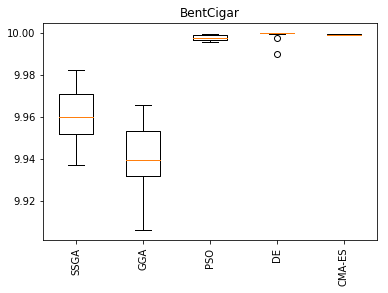

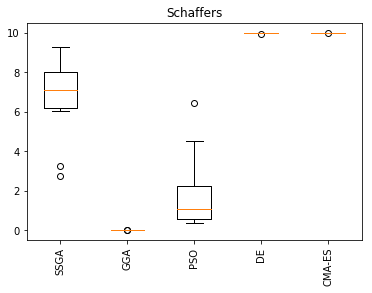

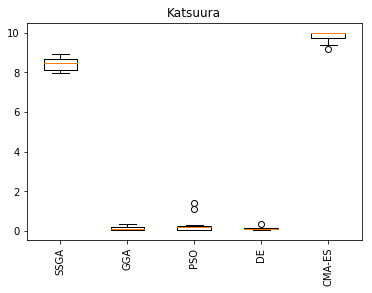

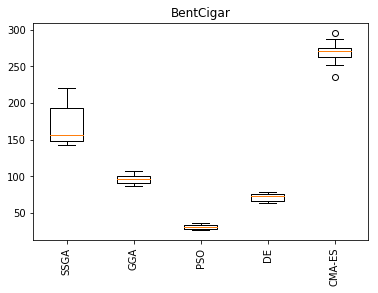

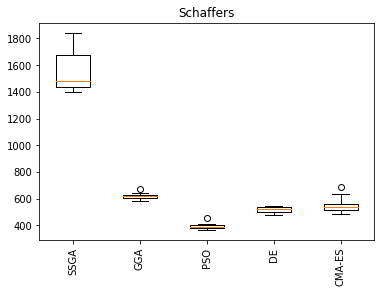

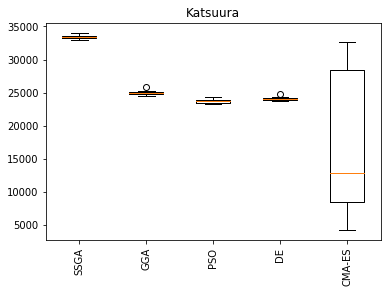

In [62]:
results_dir = 'logs/results/'
folders = sorted(os.listdir(results_dir))
runs_number = 10

fitness = np.zeros((len(algorithms), len(functions), runs_number))
time = np.zeros((len(algorithms), len(functions), runs_number))
function = 0
algorithm = 0

for folder in folders:
    folder_name = results_dir + folder
    with open(folder_name + '/run.log') as f:
        n = 0
        for line in f.readlines():
            line = line.replace('\n', '').split()
            if line[0] == "Score:":
                fitness[algorithm, function, n] = (float(line[1]))
            elif line[0] == "Runtime:":
                time[algorithm, function, n] = (float(line[1].replace('ms', '')))
                n+=1
    function = (function + 1) % len(functions)
    if function == 0:
        algorithm += 1

axis = np.arange(1, len(algorithms)+1)

for index, function in enumerate(functions):
    plt.figure()
    plt.boxplot(np.transpose(fitness[:,index,:]))
    plt.xticks(axis, algorithms, rotation='vertical')
    plt.title(function)
    
for index, function in enumerate(functions):
    plt.figure()
    plt.boxplot(np.transpose(time[:,index,:]))
    plt.xticks(axis, algorithms, rotation='vertical')
    plt.title(function)

In [58]:
gridsearch_dir = 'logs/gridSearch/'
files = sorted(os.listdir(gridsearch_dir))
for f in files:
    if '0.7999999999999999' in f:
        new_f = f.replace('0.7999999999999999', '0.8')
        os.rename(gridsearch_dir + f, gridsearch_dir + new_f)
        f = new_f
    if '0.8999999999999999' in f:
        new_f = f.replace('0.8999999999999999', '0.9')
        os.rename(gridsearch_dir + f, gridsearch_dir + new_f)
        f = new_f
    if '0.30000000000000004' in f:
        new_f = f.replace('0.30000000000000004', '0.3')
        os.rename(gridsearch_dir + f, gridsearch_dir + new_f)

In [ ]:
0.8999999999999999
0.7999999999999999
0.30000000000000004